**CS-5530 Assignment #2**

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read CSV file and import the raw data
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [182]:
# data overview
print ('Rows     : ', df.shape[0])
print ('Columns  : ', df.shape[1])
print ('\nAttributes : \n', df.columns.tolist())
print ('\nMissing values :  ', df.isnull().sum().values.sum())
print ('\nUnique values :  \n', df.nunique())

Rows     :  768
Columns  :  9

Attributes : 
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Missing values :   0

Unique values :  
 Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


In [183]:
# checking data types column
print("Column datatypes: ")
print(df.dtypes)

Column datatypes: 
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


When checking the missing values in raw data and data types of columns, there was no any missing values. All data in column were number. So I didn't make any change in raw data

**QUESTION 1: 
    Set a seed (to ensure work reproducibility) and take a random sample of 25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison**

In [184]:
# Set the seed
np.random.seed(200)

In [185]:
# Take a random sample of 25 observations
sample = df.sample(n=25, random_state=1)
print(sample)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
285            7      136             74             26      135  26.0   
101            1      151             60              0        0  26.1   
581            6      109             60             27        0  25.0   
352            3       61             82             28        0  34.4   
726            1      116             78             29      180  36.1   
472            0      119             66             27        0  38.8   
233            4      122             68              0        0  35.0   
385            1      119             54             13       50  22.3   
556            1       97             70             40        0  38.1   
59             0      105             64             41      142  41.5   
756            7      137             90             41        0  32.0   
341            1       95             74             21       73  25.9   
445            0      180             

In [186]:
# Calculate the mean and highest glucose values of the sample
sample_mean = round(sample['Glucose'].mean(),2)
sample_highest = round(sample['Glucose'].max(),2)
print("Mean of Sample: ", sample_mean)
print("Highest of Sample: ", sample_highest)

# Calculate the mean and highest glucose values of the population
population_mean = round(df['Glucose'].mean(),2)
population_highest = round(df['Glucose'].max(),2)
print("Mean of Population: ", population_mean)
print("Highest of Population: ", population_highest)

Mean of Sample:  118.32
Highest of Sample:  180
Mean of Population:  120.89
Highest of Population:  199


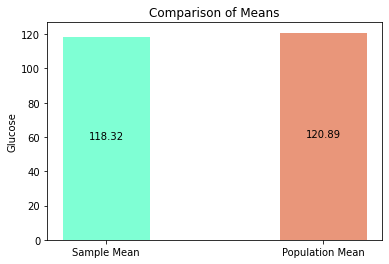

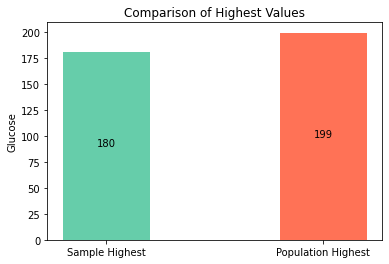

In [195]:
# Creating bar chart to compare means of sample and population
sp = ['Sample Mean', 'Population Mean']
mean = [sample_mean,population_mean]
def addlabels(mean, sp):
    for i in range(len(sp)):
        plt.text(i, mean[i]//2, mean[i], ha = 'center')
plt.bar(sp, mean,color =['#7FFFD4','#E9967A'], width=[0.4, 0.4])
addlabels(mean, sp)
plt.title('Comparison of Means')
plt.ylabel('Glucose')
plt.show()

# Creating bar chart to compare max values of sample and population
sp2 = ['Sample Highest', 'Population Highest']
max = [sample_highest,population_highest]
def addlabels(max, sp2):
    for i in range(len(sp2)):
        plt.text(i, max[i]//2, max[i], ha = 'center')
plt.bar(sp2, max,color =['#66CDAA','#FF7256'],width=[0.4, 0.4])
addlabels(max, sp2)
plt.title('Comparison of Highest Values')
plt.ylabel('Glucose')
plt.plot()
plt.show()

Mean values for sample and population have not such huge difference. Highest value is 199 in population whereas it is 180 for sample.

**QUESTION 2:
    Find the 98th percentile of BMI of your sample and the population and compare the results using charts**

Sample 98th percentile:  50.81
Population 98th percentile:  47.53


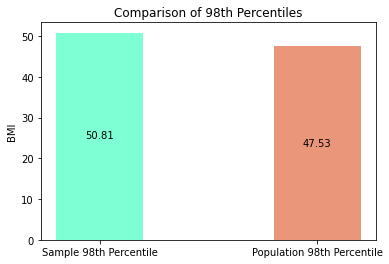

In [189]:
# Find the 98th percentile of BMI of the sample and the population
sample_percentile = round(np.percentile(sample['BMI'], 98),2)
population_percentile = round(np.percentile(df['BMI'], 98),2)
print("Sample 98th percentile: ", sample_percentile)
print("Population 98th percentile: ", population_percentile)

# Plot a comparison of percentiles
x = ['Sample 98th Percentile', 'Population 98th Percentile']
y = [sample_percentile, population_percentile]
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')
plt.bar(x, y, color = ['#7FFFD4','#E9967A'], width=[0.4, 0.4])
addlabels(x,y)
plt.title('Comparison of 98th Percentiles')
plt.ylabel('BMI')
plt.show()

Value of 98th percentile for sample is higher than population

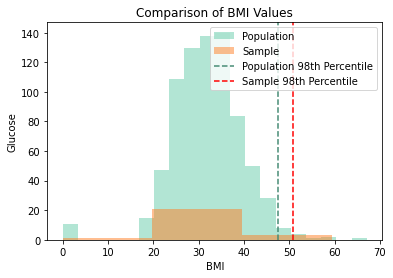

In [190]:
# Comparing the distribution of sample and population using histogram
# Showing the 98th percentile in sample and population on graph

fig, ax = plt.subplots()
ax.hist(df['BMI'], color ='#66CDAA', alpha=0.5, label='Population', bins=20)
ax.hist(sample['BMI'], color ='#FF7F24', alpha=0.5, label ='Sample', bins=3)
ax.axvline(population_percentile, color ='#458B74', linestyle='--', label='Population 98th Percentile')
ax.axvline(sample_percentile, color='red', linestyle='--', label='Sample 98th Percentile')
ax.set_title('Comparison of BMI Values')
ax.set_xlabel('BMI')
ax.set_ylabel('Glucose')
ax.legend()
plt.show()

**QUESTION 3:
    Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison. Report on your findings**

Mean of Blood pressure for population:  69.10546875
STD of Blood pressure for population:  <bound method NDFrame._add_numeric_operations.<locals>.std of 0      72
1      66
2      64
3      66
4      40
       ..
763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, Length: 768, dtype: int64>
98th percentile for population:  99.31999999999994

Comparison for Blood pressure statistics between population and bootstrap sample


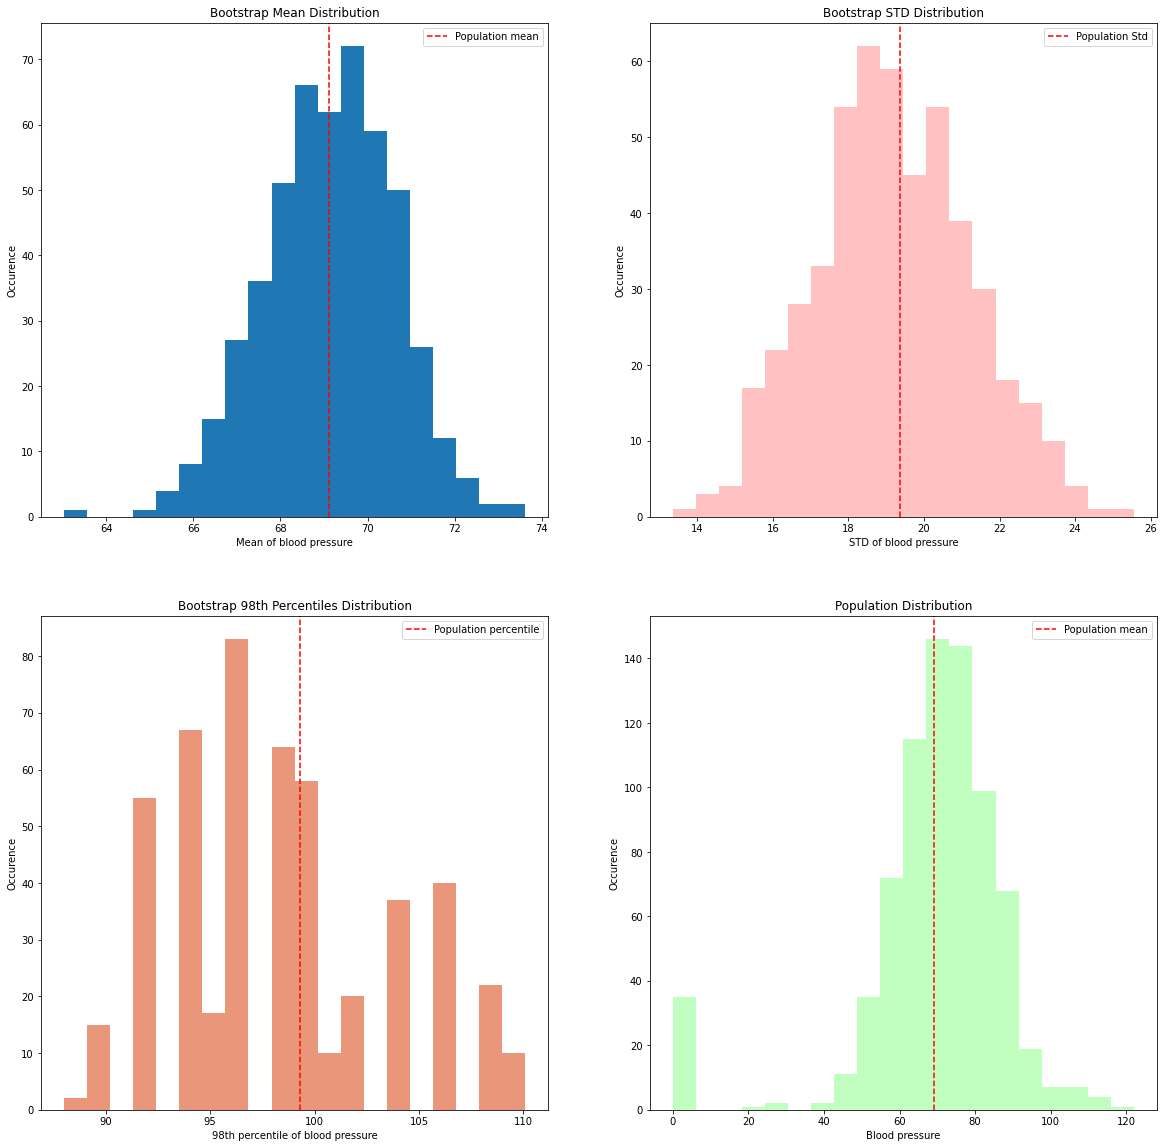

In [194]:
# Set the seed
np.random.seed(500)

# Create an empty list to store the means, standard deviations, and 98th percentiles
bp_mean = []
bp_stds = []
bp_percentiles = []

bp_population = df['BloodPressure']
bp_population_mean = bp_population.mean()
bp_population_std = bp_population.std()
bp_population_percentile = np.percentile(bp_population, 98) 

print("Mean of Blood pressure for population: ", bp_population_mean)
print("STD of Blood pressure for population: ", bp_population.std)
print("98th percentile for population: ", bp_population_percentile)

# Loop over 500 bootstrap samples of size 150
for i in range(500):
    bp_sample = np.random.choice(df['BloodPressure'], size=150, replace=True)
    bp_mean.append(np.mean(bp_sample))
    bp_stds.append(np.std(bp_sample))
    bp_percentiles.append(np.percentile(bp_sample, 98))
    
# Comparing statistics for Blood pressure in both sample and population by using chart
    
print("\nComparison for Blood pressure statistics between population and bootstrap sample")   
fig, axs = plt.subplots(2,2,figsize=(20, 20))

axs[0, 0].axvline(bp_population_mean, color = 'red', linestyle = '--', label = 'Population mean')
axs[0, 0].hist(bp_mean, bins=20)
axs[0, 0].set_title('Bootstrap Mean Distribution')
axs[0, 0].set_xlabel('Mean of blood pressure')
axs[0, 0].set_ylabel('Occurence')
axs[0, 0].legend()

axs[0, 1].axvline(bp_population_std, color='red', linestyle='--', label = 'Population Std')
axs[0, 1].hist(bp_stds, bins=20, color = '#FFC1C1')
axs[0, 1].set_title('Bootstrap STD Distribution')
axs[0, 1].set_xlabel('STD of blood pressure')
axs[0, 1].set_ylabel('Occurence')
axs[0, 1].legend()

axs[1, 0].axvline(bp_population_percentile, color='red', linestyle = '--', label = 'Population percentile')
axs[1, 0].hist(bp_percentiles, bins=20, color = '#E9967A')
axs[1, 0].set_title('Bootstrap 98th Percentiles Distribution')
axs[1, 0].set_xlabel('98th percentile of blood pressure')
axs[1, 0].set_ylabel('Occurence')
axs[1, 0].legend()

axs[1, 1].axvline(bp_population_mean, color='red', linestyle = '--', label = 'Population mean')
axs[1, 1].hist(bp_population, bins=20, color = '#C1FFC1')
axs[1, 1].set_title('Population Distribution')
axs[1, 1].set_xlabel('Blood pressure')
axs[1, 1].set_ylabel('Occurence')
axs[1, 1].legend()

plt.show()

Summary:
    - Approximately for 60 bootstrap sample, mean values are closest to mean of population. While population mean is 69, most of sample means are around 70. Therefore, there is not such significant difference between sample and population. For approximately 58 bootstrap sample, standard deviations are same as population. Around 98 percentile of population is lower than 99 for blood pressure where 98% of around 80 samples is lower than 96. Based on above statistics, we can conclude that there are not huge differences between sample and population.